<a href="https://colab.research.google.com/github/faranbutt/CIFAR-10-Prediction-ANN-/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print("Training Set dimensions are: ",'X_train = ',x_train.shape,"Y_train = ",y_train.shape)
print("Testing Set dimensions are: ",'X_test = ',x_test.shape,'Y_test = ',y_test.shape)

Training Set dimensions are:  X_train =  (50000, 32, 32, 3) Y_train =  (50000, 1)
Testing Set dimensions are:  X_test =  (10000, 32, 32, 3) Y_test =  (10000, 1)


In [ ]:
classes =["plane","car","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
print('No of dimension of train labels',y_train.ndim)
print('No of dimension of test labels',y_test.ndim)

No of dimension of train labels 1
No of dimension of test labels 1


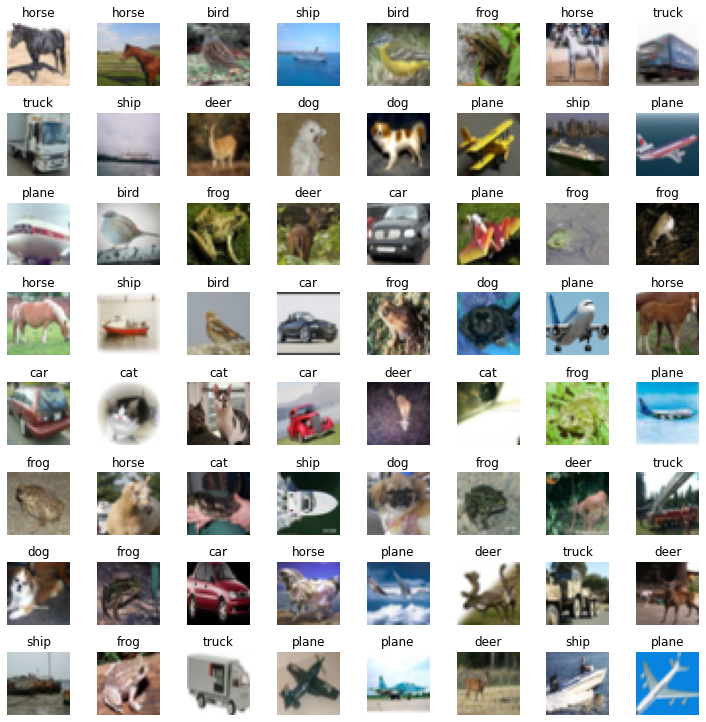

In [ ]:
m,n,c,color=x_train.shape
fig,axes=plt.subplots(8,8,figsize=(10,10))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
  random_index=np.random.randint(m)
  x_rand_reshaped=x_train[random_index]
  ax.imshow(x_rand_reshaped)
  a=y_train[random_index]
  ax.set_title(classes[a])
  ax.set_axis_off()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(5000,activation='relu'),
    Dense(4000,activation='relu'),
    Dense(300,activation='relu'),
    Dense(10,activation='Softmax')
    
    ])

In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 4000)              20004000  
                                                                 
 dense_2 (Dense)             (None, 300)               1200300   
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 36,572,310
Trainable params: 36,572,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1563/1563 [==============================] - 13s 7ms/step - loss: 2.2110 - accuracy: 0.2476
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1441 - accuracy: 0.3212
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1189 - accuracy: 0.3450
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1018 - accuracy: 0.3620
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0902 - accuracy: 0.3707
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0798 - accuracy: 0.3828
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0713 - accuracy: 0.3917
Epoch 8/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0639 - accuracy: 0.3974
Epoch 9/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0571 - accuracy: 0.4062
Epoch 10/100
1563/1563 [==============================] - 9s 6ms/st

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[4.62666797e-12, 1.31224837e-07, 5.08455514e-07, ...,
        1.72348590e-20, 5.77190205e-12, 1.90733049e-14],
       [1.03898128e-05, 7.07082927e-01, 3.11478138e-13, ...,
        2.28211614e-16, 5.32823872e-12, 2.92906582e-01],
       [8.06924105e-02, 9.18859243e-01, 4.18246174e-07, ...,
        4.19069801e-09, 6.10374773e-09, 4.47746366e-04],
       ...,
       [1.50341900e-15, 2.03989547e-15, 4.94346097e-02, ...,
        1.01328606e-16, 1.27963428e-12, 4.44196898e-13],
       [4.01613764e-09, 1.11373578e-04, 7.74559612e-06, ...,
        9.10318376e-10, 7.69303270e-08, 2.57540371e-08],
       [3.53730393e-05, 8.25100506e-06, 1.31727603e-07, ...,
        9.98646438e-01, 2.07076710e-06, 3.27284106e-05]], dtype=float32)

In [ ]:
y_new_pred = tf.math.argmax(y_pred, axis = -1)
y_new_pred=y_new_pred.numpy()
y_new_pred

array([3, 1, 1, ..., 5, 4, 7])

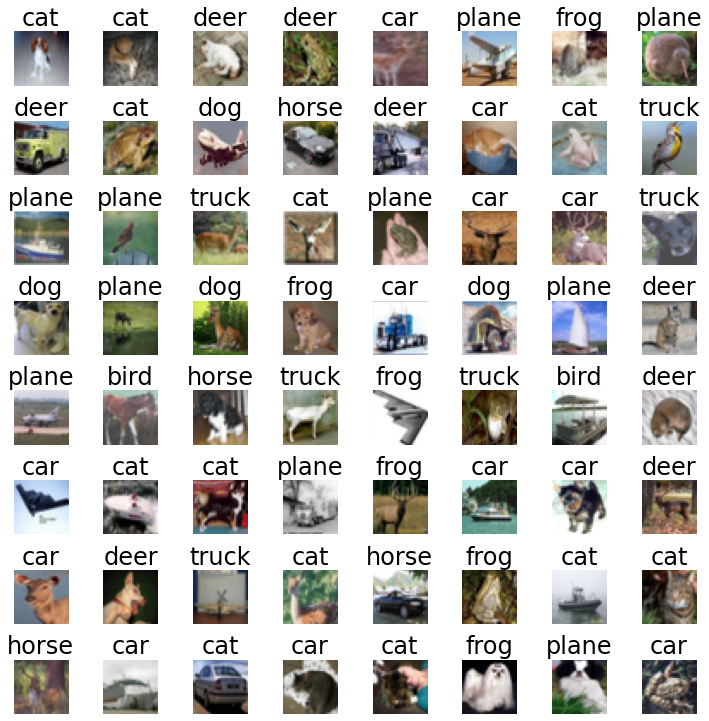

In [ ]:
m,n,c,color=x_test.shape
fig,axes=plt.subplots(8,8,figsize=(10,10))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
  random_index=np.random.randint(m)
  x_rand_reshaped=x_train[random_index]
  ax.imshow(x_rand_reshaped)
  a=y_new_pred[random_index]
  ax.set_title(classes[a])
  ax.set_axis_off()

In [ ]:
c_m=confusion_matrix(y_test,y_new_pred)

In [ ]:
labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

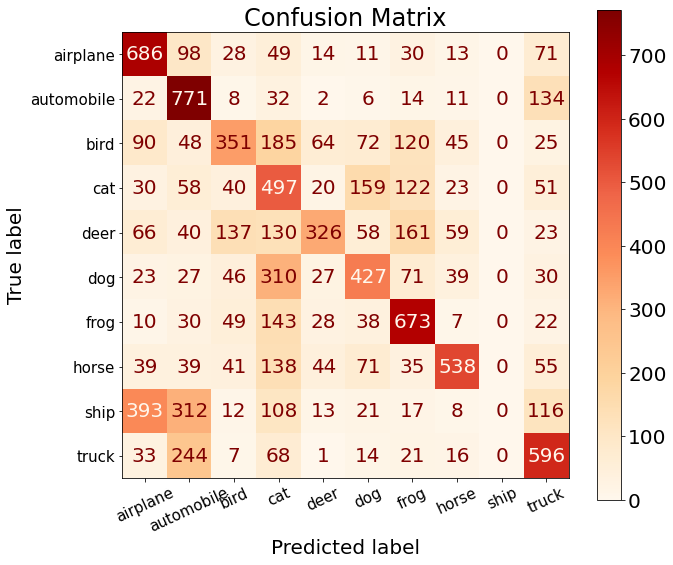

In [ ]:
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()

In [ ]:
accuracy_score(y_test,y_new_pred)

0.4865